# Regresión II: No entiendo lo que dicen

Debido a la contingencia ocasionada por el COVID, las teleconferencias son ahora mucho más comunes. Sin embargo, muchas veces el ruido de fondo no permite enender que es lo que una persona ha dicho, lo que ocasiona demoras en las reuniones. Además, el ruido de fondo (tráfico, perros, otras personas hablando, lluvia, etc..) puede ser un distractor importante en las reuniones. El profesor Alexander esta un poco cansado con esta situación, ya qu elas reuniones se alargan más de lo debido, y esto le quita tiempo para realizar otras actividades. Como los estudiantes de Machine LEarning ya saben utilizar redes neuronales, el profesor Alexander quiere que sus estudiantes desarrollen un sistema de mejora del audio, la idea es que los estudiantes desarrollen un modelo utilizando redes neuronales, que sea capaz de reducir el ruido de fondo de las señales de audio que se procesan. 

Para la realización de este proyecto el estudiante debera:

1. Crear una base de datos con señales de personas hablando, y de diferentes ruidos de fondo, los cuales deben ser mezclados para generar las señales de entrada en el modelo de regresión. Tenga en cuenta las sigueintes consideraciones:
    * Una red aprende con base en la información que le proporcionemos, asi que al crear la base de datos tenga en cuenta todas las posibilidades que se les ocurra de ruido de fondo y de señales de habla. Además la base de datos debe contener diferentes muestras de diferentes personas, invluyendo niños, niñas, mujeres y hombres. El objetivo es generalizar, no memorizar patrones, para esto debemos darle suficiente información a la red.
    * Una señal de voz puede tener entre 8000 y 40000 mmuestras por segundo de grabación. Esto es bastante para ser utilizado como entrada en la red. recuerde que entre mayor dimensionalidad en los datos de entrada, mayor será la complejidad de la red necesaria. Para disminuir la complejidad el profesor Alexander recomienda el uso de la densidad espectral de potencia (PSD) utilizando un número fijo de bins frecuenciales. La PSD representa la distribucion en frecuencia de la potencia de la señal.   
2. Definir las arquitecturas de red que debe probar.
3. Escoger la red que mejor se desempeñe.
4. Evaluar el rendimiento de la red.

Tenga en cuenta que todo el procedimiento debe ser lo mas amigable para probar. Es decir si el profesor Alexander quiere probar con una señal de voz que él produzca, entonces él solo deberia ingresar la señal de voz y el programa debería proporcionar a la salida una estimación de la señal de voz mejorada, con el ruido de fondo reducido.

Además el profesor quiere que contesten las siguientes preguntas:

1. ¿Qué puede concluir del comportamiento de la red y los datos proporcionados?
2. ¿Qué criterio utilizó para seleccionar la arquitectura de la red?
3. ¿Tiene la red el comportamiento esperado?, si no es así, ¿A qué cree que se debe esto?
4. ¿Qué le mejoraria al modelo que usted diseño?, ¿Cómo implementaría esas mejoras?

## Qué se debe entregar:

Par ala entrega del proyecto deben porporcionar:

1. La base de datos generada.
2. Un notebook de Jupyter donde presentan todo el pipeline para el entrenamiento de la red. Cada parte debe ser explicada.
3. El notebook debe incluir una función que permita ingresar una muestra de entrada y se proporcione la salida, sin mas pasos intermedios. Por lo tanto en esta función se debe tener en cuenta el acondicionamiento de los datos, antes de ser introducidos en la red neuronal par arealizar las predicciones.
4. El notebook debe incluir las respuestas a las preguntas planteadas.

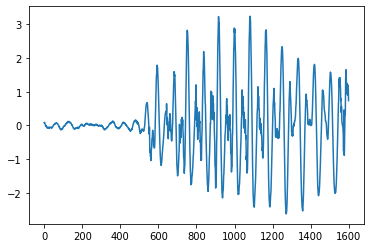

In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # Set 0 for GPU again

from scipy.io import wavfile
#from scipy.signal import welch as PSD
from scipy.signal import resample
import matplotlib.pyplot as plt
import numpy as np


filename = 'verde4.wav'

SECOND_LENGTHS = 2
EXPECTED_HZ = 8000
CHUNK_WINDOW = 0.2

SAMPLE_HZ, palabra = wavfile.read('database/' + filename)

assert EXPECTED_HZ == SAMPLE_HZ and EXPECTED_HZ*SECOND_LENGTHS == len(palabra), 'Invalid File!'
assert palabra.dtype == 'int16', 'Not an int16 dtype!'

palabra_normalizada = (palabra - palabra.mean(axis=0)) / palabra.std(axis=0, ddof=1)


pedazitosde02_normalizados = np.split(palabra_normalizada,SECOND_LENGTHS/CHUNK_WINDOW)


sample_pedazo = pedazitosde02_normalizados[0]

#plt.plot(np.concatenate(pedazitosde02_normalizados))
plt.plot(pedazitosde02_normalizados[0])

#plt.plot( palabra_normalizada )

# Reducción

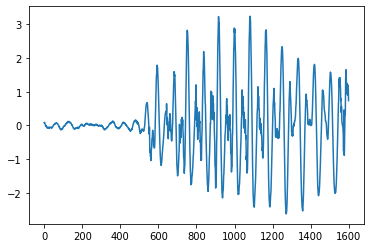

In [31]:
REDUCE_TO = 1600

#reduced_pieces = [np.fft.rfft(  pedazo , REDUCE_TO) for pedazo in pedazitosde02_normalizados]

#reconstructed = [np.fft.irfft(reduced, 1600) for reduced in reduced_pieces]
#plt.plot(reconstructed[0])
reduced_pieces = [ resample(pedazo, REDUCE_TO) for pedazo in pedazitosde02_normalizados]
plt.plot(reduced_pieces[0])

# Reconstruccion

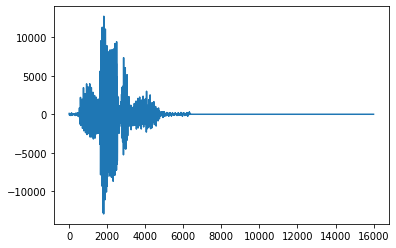

In [33]:
filteredwav = np.concatenate( [ resample(reduced,1600) for reduced in reduced_pieces] )  

filteredwav = filteredwav*palabra.std(axis=0, ddof=1) + palabra.mean(axis=0) # Tomamos los valores originales
filteredwav = np.around(filteredwav).astype('int16')

plt.plot(filteredwav)

wavfile.write('reconstructed.wav',EXPECTED_HZ, filteredwav)

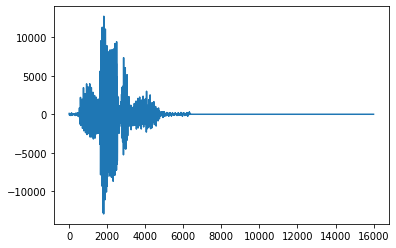

In [34]:
plt.plot(palabra)

# Mezcla de Ruidos

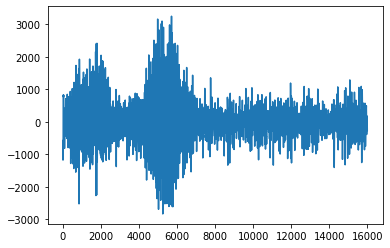

In [42]:
SAMPLE_HZ, noise1 = wavfile.read('noises/fan1.wav')


noise1 = np.around(noise1 * 0.1).astype('int16')
SAMPLE_HZ, palabratest = wavfile.read('database/universidad2.wav')

plt.plot(noise1 + palabratest)


wavfile.write('reconstructed.wav',SAMPLE_HZ, noise1 + palabratest)